In [4]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/MyDrive/기계학습/팀프로젝트

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/기계학습/팀프로젝트'
/content/drive/MyDrive/기계학습/팀프로젝트


In [5]:
import pandas as pd

player_stat_data = pd.read_csv('final_nba_data_2.csv')
player_stat_data.head()

,name,start,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,target,Pos,G,Pos_PG,Pos_SG,Pos_SF,Pos_PF,Pos_C,contract_period,Annual
0,A.J. Lawson,2023,0.000000,7.290196,1.407843,2.917647,0.484275,0.521569,1.488235,0.334510,...,0.013971,SG,59.647059,False,True,False,False,False,4,3
1,Aaron Brooks,2012,9.076271,21.790678,3.694068,9.929661,0.378297,1.194068,4.012712,0.299822,...,0.057252,PG,118.000000,True,False,False,False,False,2,6
2,Aaron Brooks,2013,18.679245,18.783019,2.691509,5.989623,0.446028,0.903774,2.531132,0.369425,...,0.016154,PG,106.000000,True,False,False,False,False,1,7
3,Aaron Brooks,2014,12.768000,20.421200,2.986000,7.197600,0.419640,1.143600,3.049600,0.380432,...,0.018167,PG,127.888000,True,False,False,False,False,1,8
4,Aaron Brooks,2015,12.982301,22.125221,3.564602,8.780973,0.407757,1.385398,3.565044,0.387978,...,0.032143,PG,121.504425,True,False,False,False,False,1,9


In [6]:
from sklearn.svm import SVR
import joblib

best_model = joblib.load('./best_svr.pkl')

In [7]:
print(best_model.get_params())

{'C': 100.0, 'cache_size': 200, 'coef0': 0.0001, 'degree': 2, 'epsilon': 0.21544346900318823, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': False, 'tol': 0.001, 'verbose': False}


In [8]:
from sklearn.preprocessing import StandardScaler

#데이터 전처리
player_stat_data = player_stat_data.drop(columns=['name','debut','start','end','salary','birth'])

player_stat_data['Pos'] = player_stat_data['Pos'].str.split('-').str[0]
player_stat_data = pd.get_dummies(player_stat_data, columns=['Pos'])

#정규화
scaler = StandardScaler()
scaled_columns = player_stat_data.columns
player_stat_data[scaled_columns] = scaler.fit_transform(player_stat_data[scaled_columns])

player_stat_data.head()

,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,Pos_SF,Pos_PF,Pos_C,contract_period,Annual,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,-0.906758,-1.407420,-0.827611,-0.907726,0.385611,-0.403773,-0.437199,0.329981,-0.801898,-0.911600,...,-0.482884,-0.46985,-0.46985,1.702789,-1.019341,-0.464811,-0.467836,-0.501784,-0.480885,1.714643
1,-0.541070,0.243715,0.279762,0.716897,-0.763229,0.480894,0.848509,0.063081,0.131853,0.428995,...,-0.482884,-0.46985,-0.46985,0.042148,-0.282197,-0.464811,-0.467836,1.992890,-0.480885,-0.583212
2,-0.154161,-0.098760,-0.205845,-0.195976,-0.028992,0.099015,0.093945,0.598628,-0.287044,-0.325319,...,-0.482884,-0.46985,-0.46985,-0.788172,-0.036483,-0.464811,-0.467836,1.992890,-0.480885,-0.583212
3,-0.392328,0.087776,-0.063203,0.083902,-0.315051,0.414504,0.357999,0.683323,-0.246000,-0.117978,...,-0.482884,-0.46985,-0.46985,-0.788172,0.209231,-0.464811,-0.467836,1.992890,-0.480885,-0.583212
4,-0.383694,0.281809,0.217053,0.450756,-0.443871,0.732588,0.620513,0.741384,-0.052598,0.197702,...,-0.482884,-0.46985,-0.46985,-0.788172,0.454946,-0.464811,-0.467836,1.992890,-0.480885,-0.583212


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['target']), player_stat_data['target'], test_size=0.3)

best_model.fit(train_X, train_y)
prediction = best_model.predict(test_X)
model_r2_score = r2_score(test_y, prediction)
print(model_r2_score)


0.7116424924121838


<ipython-input-10-514017a8d34b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlations, y=best_feature, palette='viridis')


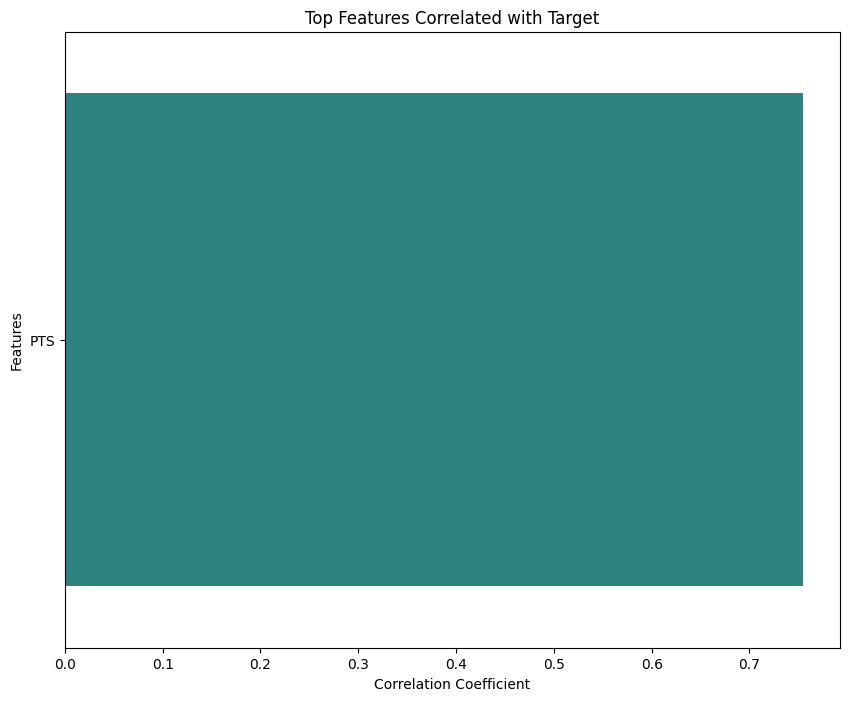

Top 1 Features R2 Score: 0.7059280914378752


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = player_stat_data.corr()
# target_correlations = correlation_matrix['target'].drop('target')
target_correlations = correlation_matrix['target'].drop(['target', 'Pos_C',	'Pos_PF',	'Pos_PG',	'Pos_SF',	'Pos_SG', 'contract_period'])
sorted_correlations = target_correlations.abs().sort_values(ascending=False)

best_r2_score = 0
best_N = 0
best_feature = None
target_length = len(target_correlations.tolist()) + 1
for N in range(1, target_length):
    top_N_features = sorted_correlations.head(N).index

    top_N_feature_data = player_stat_data[top_N_features]
    train_X, test_X, train_y, test_y = train_test_split(top_N_feature_data, player_stat_data['target'], test_size=0.1, random_state=42)

    best_model.fit(train_X, train_y)
    test_predictions = best_model.predict(test_X)

    r2 = r2_score(test_y, test_predictions)
    if r2 > best_r2_score:
        best_r2_score = r2
        best_N = N
        best_feature = top_N_features

# best_feature에 해당하는 상위 N개의 상관계수 값을 가져옵니다.
top_correlations = sorted_correlations.head(best_N).tolist()

plt.figure(figsize=(10, 8))
sns.barplot(x=top_correlations, y=best_feature, palette='viridis')
plt.title('Top Features Correlated with Target')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

print(f"Top {best_N} Features R2 Score: {best_r2_score}")

-3.001655944096382
0.8130761296207514


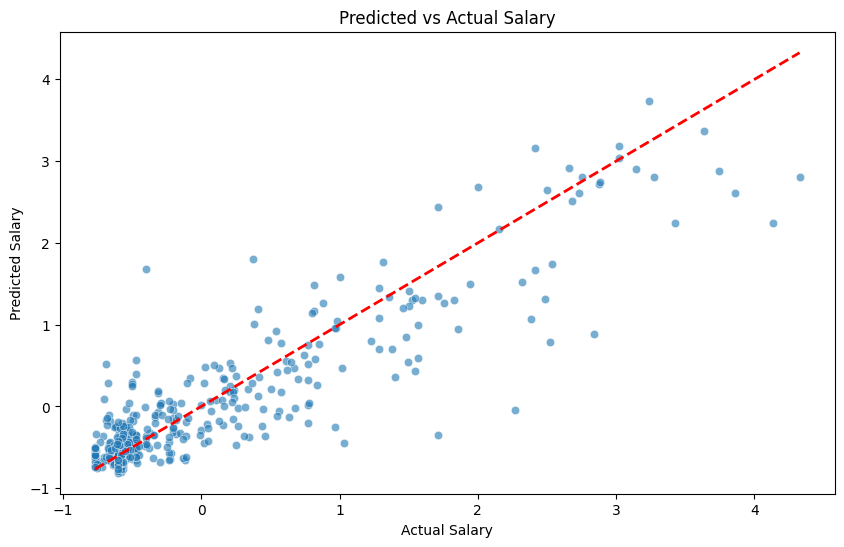

In [11]:
import pandas as pd

player_stat_data = pd.read_csv('final_nba_data_2.csv')
player_stat_data.head()

from sklearn.svm import SVR
import joblib

best_model = joblib.load('./best_svr.pkl')

from sklearn.preprocessing import StandardScaler

#데이터 전처리
player_stat_data = player_stat_data.drop(columns=['name','debut','start','end','salary','birth'])

player_stat_data['Pos'] = player_stat_data['Pos'].str.split('-').str[0]
player_stat_data = pd.get_dummies(player_stat_data, columns=['Pos'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['target']), player_stat_data['target'], test_size=0.3)

best_model.fit(train_X, train_y)
prediction = best_model.predict(test_X)
model_r2_score = r2_score(test_y, prediction)

print(model_r2_score)

#정규화
scaler = StandardScaler()
player_stat_data['target'] = scaler.fit_transform(player_stat_data[['target']])

player_stat_data.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['target']), player_stat_data['target'], test_size=0.3)

best_model.fit(train_X, train_y)
prediction = best_model.predict(test_X)
model_r2_score = r2_score(test_y, prediction)

print(model_r2_score)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_y, y=prediction, alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Predicted vs Actual Salary')
plt.show()

-0.18123751515014863
0.7485874841622482


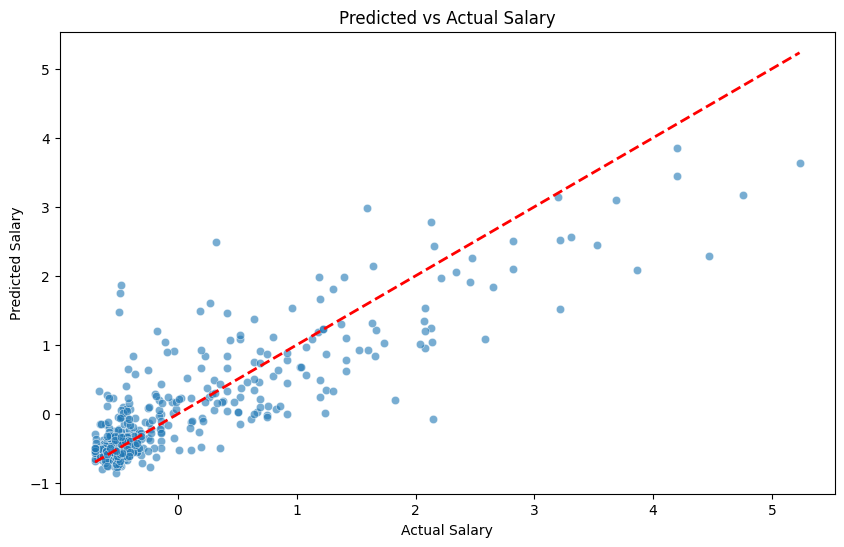

In [12]:
import pandas as pd

player_stat_data = pd.read_csv('final_nba_data_2.csv')

from sklearn.svm import SVR
import joblib

best_model = joblib.load('./best_svr.pkl')

from sklearn.preprocessing import StandardScaler

#데이터 전처리
player_stat_data = player_stat_data.drop(columns=['name','debut','start','end','target','birth'])

player_stat_data['Pos'] = player_stat_data['Pos'].str.split('-').str[0]
player_stat_data = pd.get_dummies(player_stat_data, columns=['Pos'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['salary']), player_stat_data['salary'], test_size=0.3)

best_model.fit(train_X, train_y)
prediction = best_model.predict(test_X)
model_r2_score = r2_score(test_y, prediction)

print(model_r2_score)

#정규화
scaler = StandardScaler()
player_stat_data['salary'] = scaler.fit_transform(player_stat_data[['salary']])

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['salary']), player_stat_data['salary'], test_size=0.3)

best_model.fit(train_X, train_y)
prediction = best_model.predict(test_X)
model_r2_score = r2_score(test_y, prediction)

print(model_r2_score)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_y, y=prediction, alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Predicted vs Actual Salary')
plt.show()

0.4620143644595217


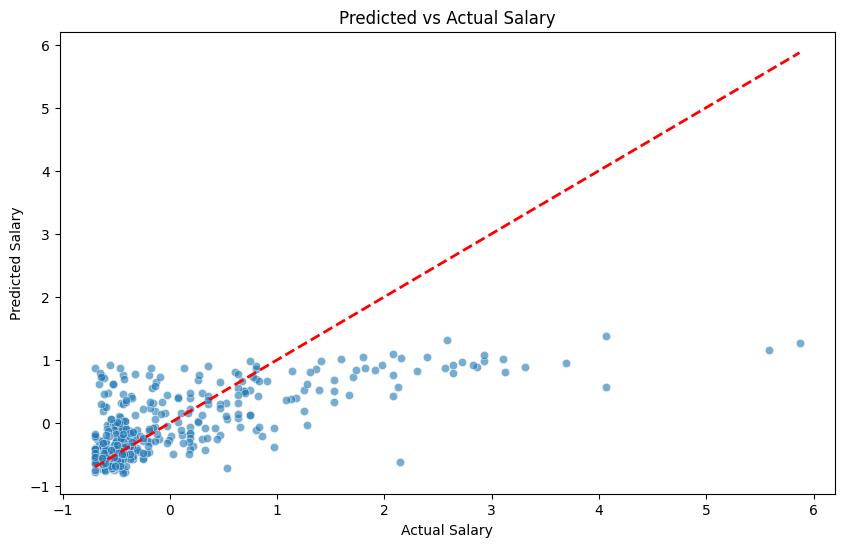

In [13]:
import pandas as pd

player_stat_data = pd.read_csv('final_nba_data_2.csv')
player_stat_data.head()

from sklearn.svm import SVR
import joblib

best_model = joblib.load('./best_svr.pkl')

from sklearn.preprocessing import StandardScaler

#데이터 전처리
player_stat_data = player_stat_data.drop(columns=['name','target','birth'])

player_stat_data['Pos'] = player_stat_data['Pos'].str.split('-').str[0]
player_stat_data = pd.get_dummies(player_stat_data, columns=['Pos'])

#정규화
scaler = StandardScaler()
player_stat_data['salary'] = scaler.fit_transform(player_stat_data[['salary']])

player_stat_data.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['salary']), player_stat_data['salary'], test_size=0.3)

best_model.fit(train_X, train_y)
prediction = best_model.predict(test_X)
model_r2_score = r2_score(test_y, prediction)

print(model_r2_score)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_y, y=prediction, alpha=0.6)
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Predicted vs Actual Salary')
plt.show()

-2.4464777654469403


<ipython-input-32-41e7e6bd9de8>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_10_features, palette='viridis')


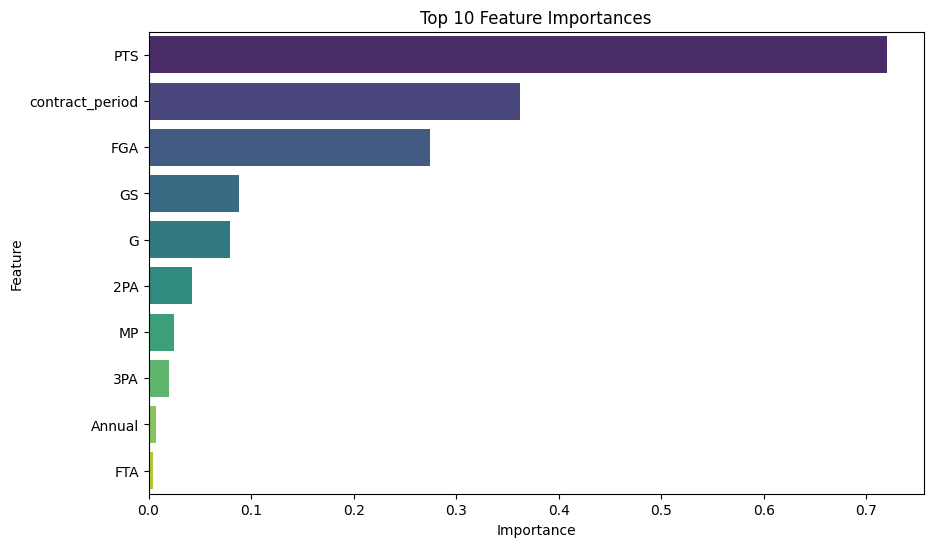

In [32]:
import pandas as pd

player_stat_data = pd.read_csv('final_nba_data_2.csv')
player_stat_data.head()

from sklearn.svm import SVR
import joblib

best_model = joblib.load('./best_svr.pkl')

from sklearn.preprocessing import StandardScaler

#데이터 전처리
player_stat_data = player_stat_data.drop(columns=['name','debut','start','end','salary','birth'])

player_stat_data['Pos'] = player_stat_data['Pos'].str.split('-').str[0]
player_stat_data = pd.get_dummies(player_stat_data, columns=['Pos'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['target']), player_stat_data['target'], test_size=0.3)

best_model.fit(train_X, train_y)
prediction = best_model.predict(test_X)
model_r2_score = r2_score(test_y, prediction)

print(model_r2_score)

#정규화
scaler = StandardScaler()
player_stat_data['target'] = scaler.fit_transform(player_stat_data[['target']])

player_stat_data.head()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train_X, test_X, train_y, test_y = train_test_split(player_stat_data.drop(columns=['target']), player_stat_data['target'], test_size=0.3)

best_model.fit(train_X, train_y)

from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, test_X, test_y, n_repeats=30, random_state=42)

importance_df = pd.DataFrame({'feature': test_X.columns, 'importance': result.importances_mean})
top_10_features = importance_df.sort_values(by='importance', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()